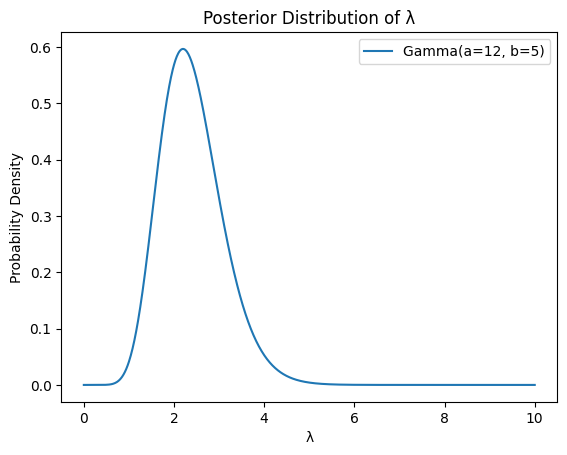

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# 事後分布のパラメータ
a_post = 12
b_post = 5

# ラムダの値の範囲を設定
lambda_range = np.linspace(0, 10, 1000)

# ガンマ分布の確率密度関数 (PDF) を計算
pdf_gamma = gamma.pdf(lambda_range, a=a_post, scale=1/b_post)

# グラフをプロット
plt.plot(lambda_range, pdf_gamma, label=f'Gamma(a={a_post}, b={b_post})')

# タイトルとラベルを追加
plt.title('Posterior Distribution of λ')
plt.xlabel('λ')
plt.ylabel('Probability Density')
plt.legend()

# グラフを表示
plt.show()


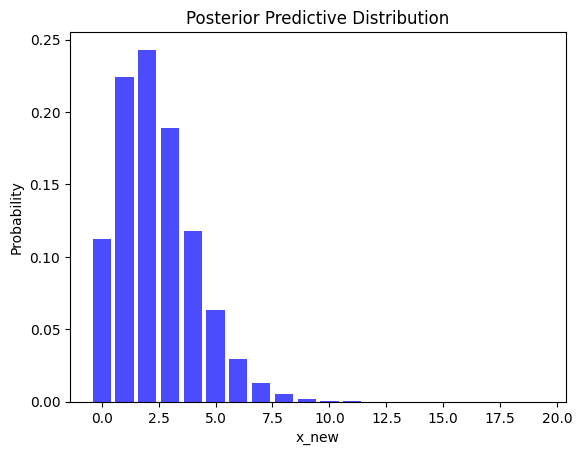

In [ ]:
from scipy.stats import nbinom

# 事後分布のパラメータ
a_post = 12  # 形状パラメータ
b_post = 5   # 逆スケール（レート）パラメータ

# 新しいデータ点 x_new が取り得る値の範囲
x_new_values = range(0, 20)

# 事後予測分布を計算（負の二項分布を使用）
p_pred = [nbinom.pmf(k=x_new, n=a_post, p=b_post/(1+b_post)) for x_new in x_new_values]

# 結果をプロット
import matplotlib.pyplot as plt

plt.bar(x_new_values, p_pred, color='blue', alpha=0.7)
plt.title('Posterior Predictive Distribution')
plt.xlabel('x_new')
plt.ylabel('Probability')
plt.show()


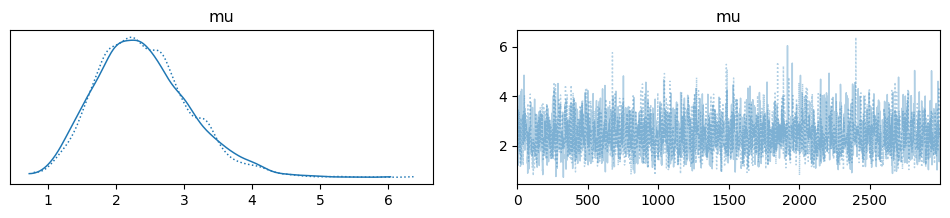

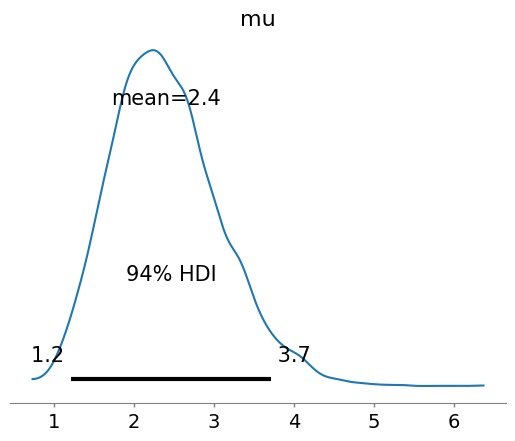

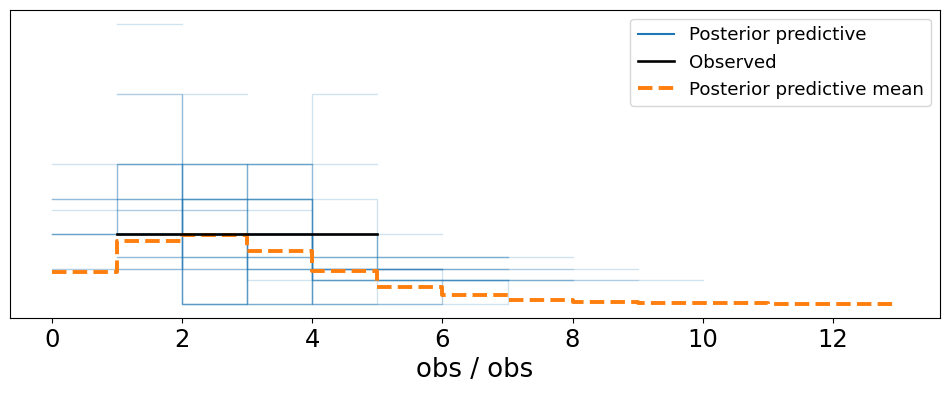

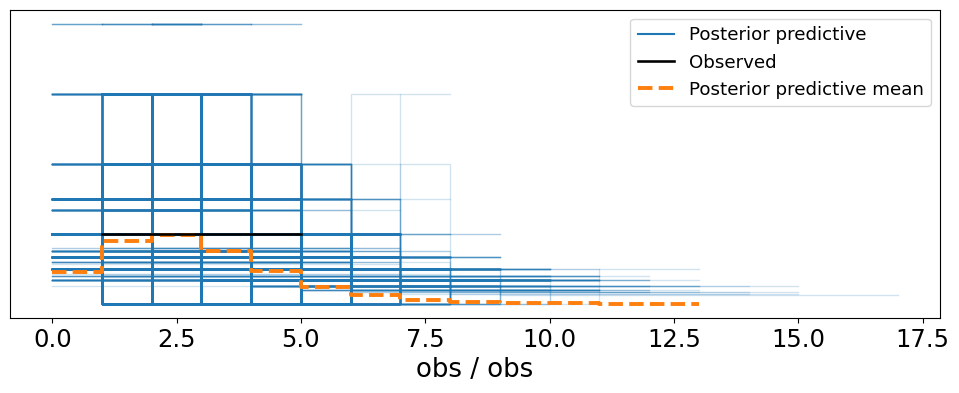

In [ ]:
import pymc as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma


# 観測データ
x = np.array([3, 2, 1, 4])

with pm.Model() as model:
    mu = pm.Gamma('mu', alpha=2, beta=1) #事前分布
    obs = pm.Poisson('obs', mu=mu, observed=x) #尤度

with model:
    trace = pm.sample(3000, return_inferencedata=False) #定義されたモデルを使って、観測データxからサンプリングされるmuの値を3000個算出している
    idata = pm.to_inference_data(trace) #複数のchainを並行してサンプリング

trace['mu']
trace['mu'].shape
idata
idata.posterior['mu'].shape
az.summary(idata)

az.plot_trace(idata);
az.summary(idata)
az.plot_posterior(idata);

with model: #事後予測分布(事後分布を使って実際のデータの予測)
    #ppc = pm.sample_posterior_predictive(trace, var_names=['obs']) # traceを直接使用
    #data_ppc = az.from_pymc3(posterior_predictive=ppc)
    ppc = pm.sample_posterior_predictive(idata, return_inferencedata=False) #このidataからサンプルされたパラメータ（この場合はmu）を使って、新しい観測データのサンプルを生成
    idata_ppc = pm.to_inference_data(posterior_predictive=ppc)

# 記述統計量（平均・分散）によるチェック
ppc_samples = ppc['obs']
ppc_samples = ppc_samples.reshape(-1, 50)
ppc_mean = ppc_samples.mean(axis=1)
ppc_var = ppc_samples.var(axis=1)

# 分布によるチェック
az.plot_ppc(idata_ppc, kind='kde', num_pp_samples=50, figsize=(12, 4));
az.plot_ppc(idata_ppc, kind='kde', num_pp_samples=3000, figsize=(12, 4));